<a href="https://colab.research.google.com/github/Simeen01/GRIPJanuary22/blob/main/Linear_Regression_(Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Prediction using Supervised Machine Learning

Concept: Linear Regression
```
**Task:** To predict the percentage of student based on the number of study hours.

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [307]:
df = pd.read_csv("http://bit.ly/w-data")

In [308]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [309]:
#No. of rows and columns in dataset
df.shape   

(25, 2)

#### The dataset has 25 rows and 2 columns along with header.

In [310]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [311]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Hours and scores are having non-null values, therefore there are no missing values.

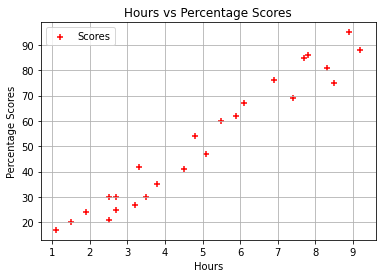

In [312]:
%matplotlib inline 
plt.title('Hours vs Percentage Scores') 
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.grid()
plt.scatter(df.Hours,df.Scores, color='red', marker='+')
plt.legend(["Scores"])

In [331]:
df.corr(method='pearson') 

,Actual,Predicted
Actual,1.000000,0.998669
Predicted,0.998669,1.000000


####There is a positive correlation between no. of hours studied and the respective percentage scores.

**Split the Data**

In [314]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

**Train and Test the Data**

In [315]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

print(f"No. of training samples = {x_train.shape[0]}")
print(f"No. of testing samples = {x_test.shape[0]}")

No. of training samples = 20
No. of testing samples = 5


In [316]:
# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(x_train, y_train) 

LinearRegression()

In [317]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [318]:
#Accuracy of the model
reg.score(x_test,y_test)

0.9664440389654272

####Accuracy of the model: 96.64%

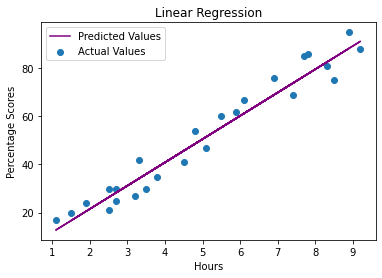

In [319]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_    #y(dependent variable) = m(coeeficient of x) * x(independent variable) + c(intercept)

# Plotting for the test data
plt.scatter(x, y)
plt.title("Linear Regression")
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.plot(x, line, color="purple")
plt.legend(['Predicted Values','Actual Values'])
plt.show()

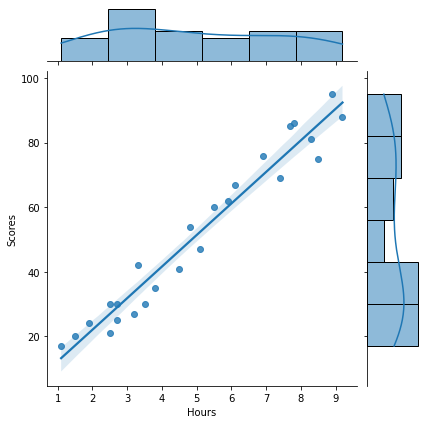

In [320]:
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

In [321]:
# Predicting the scores
y_pred = reg.predict(x_test) 

In [322]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,28.285498
1,30,26.348767
2,54,48.621177
3,95,88.324169
4,62,59.273200




```
Q. What will be the predicted score if a student studies 9.25 hrs/day?
```

In [323]:
hours = 9.25
score = reg.predict([[hours]])
print("For",hours,"Hrs, the predicted percentage score = {}".format(score[0]))

For 9.25 Hrs, the predicted percentage score = 91.71344908007254


**Evaluating the model**

In [326]:
# Coefficients
print("Coefficient: %.2f" % reg.coef_)
#Intercept
print("Intercept: %.2f" % reg.intercept_)
# Mean squared error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))  
#Mean Absolute Error 
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred)) 
# Coefficient of determination - 1 is perfect prediction
print("R2 Score - Coefficient of Determination: %.2f" % r2_score(y_test, y_pred))

Coefficient: 9.68
Intercept: 2.14
Mean Squared Error: 19.44
Mean Absolute Error: 4.03
R2 Score - Coefficient of Determination: 0.97


```
y = mx + c
Y = β0 + β1X + ϵ

score = (coeff. of x) * hours + intercept
      = 9.68 * 9.25 + 2.14
      = 91.68
```